In [3]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('code').getOrCreate()

In [4]:
df1 = spark.read.csv('DEI_Dataset.csv', inferSchema=True, header=True)
df2 = spark.read.csv('DEI_2.csv', inferSchema=True, header=True)

df = df1.join(df2, df1.Id == df2.Id,"inner")

# Data exploration

In [5]:
df.show()

+---+---------+---------+--------+-------+------+------------------+-----+----------+---------+----------+--------+-------+-------------+------+--------------------+---+--------------+-----------+-----------+----------------+-------------+
| Id|     Name|  Surname|Division|Manager|Gender|Sexual_Orientation|LGBTQ|Indigenous|Ethnicity|Disability|Minority|Veteran|Date of Birth|   Age|               Email| Id|Preferred Name|Nationality|    Hobbies|        Pronouns|Mobile Number|
+---+---------+---------+--------+-------+------+------------------+-----+----------+---------+----------+--------+-------+-------------+------+--------------------+---+--------------+-----------+-----------+----------------+-------------+
|  1|  Deborah|  Addison|       0|      0|     3|                 0|    2|         0|        0|         1|       0|      0|    4/06/1993| 300.0|Deborah.Addison@m...|  1|       Deborah|     Polish| Travelling|They/them/theirs| 363 436 1096|
|  2|     Mona|     Hill|       1|      

In [6]:
df.describe().show()

+-------+------------------+-----+-------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+-------------+------------------+--------------------+------------------+--------------+-----------+-----------+-----------+-------------+
|summary|                Id| Name|Surname|          Division|           Manager|            Gender|Sexual_Orientation|             LGBTQ|         Indigenous|         Ethnicity|         Disability|          Minority|           Veteran|Date of Birth|               Age|               Email|                Id|Preferred Name|Nationality|    Hobbies|   Pronouns|Mobile Number|
+-------+------------------+-----+-------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+-------------+------

In [7]:
df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Surname: string (nullable = true)
 |-- Division: integer (nullable = true)
 |-- Manager: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Sexual_Orientation: integer (nullable = true)
 |-- LGBTQ: integer (nullable = true)
 |-- Indigenous: integer (nullable = true)
 |-- Ethnicity: integer (nullable = true)
 |-- Disability: integer (nullable = true)
 |-- Minority: integer (nullable = true)
 |-- Veteran: integer (nullable = true)
 |-- Date of Birth: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Email: string (nullable = true)
 |-- Id: integer (nullable = true)
 |-- Preferred Name: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Hobbies: string (nullable = true)
 |-- Pronouns: string (nullable = true)
 |-- Mobile Number: string (nullable = true)



# Data Manipulation

In [8]:
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType)

In [9]:
df.select('age').show()

df.select('Date of birth').show()

+------+
|   age|
+------+
| 300.0|
|   5.9|
|1000.0|
|  44.0|
|  50.0|
|  37.0|
|  34.0|
|  27.0|
|  52.0|
|  47.0|
|  54.0|
|  35.0|
|  54.0|
|  32.0|
|  29.0|
|  32.0|
|  39.0|
|  33.0|
|  29.0|
|  34.0|
+------+
only showing top 20 rows

+-------------+
|Date of birth|
+-------------+
|    4/06/1993|
|    2/08/1963|
|   25/04/1979|
|   11/02/1978|
|   11/03/1972|
|   11/01/1985|
|    4/09/1988|
|    9/11/1994|
|         null|
|   28/02/1975|
|   27/03/1968|
|    1/01/1987|
|   11/01/1968|
|   13/02/1990|
|   11/01/1993|
|    6/08/1990|
|   17/02/1983|
|   14/10/1988|
|         null|
|   19/10/1987|
+-------------+
only showing top 20 rows



In [10]:
result = df.groupBy("Ethnicity").count()

# Show the results
result.show()

+---------+-----+
|Ethnicity|count|
+---------+-----+
|        1| 1718|
|        3|  352|
|        5|  105|
|        4|  317|
|        2|  416|
|        0| 7092|
+---------+-----+



In [11]:
result = df.groupBy("Manager").count()

# Show the results
result.show()

+-------+-----+
|Manager|count|
+-------+-----+
|      1|  981|
|      0| 9019|
+-------+-----+



In [12]:
result = df.groupBy("Division").count()

# Show the results
result.show()

+--------+-----+
|Division|count|
+--------+-----+
|       1| 1340|
|       6| 1227|
|       3|  990|
|       5| 2245|
|       4|  463|
|       2| 1429|
|       0| 2306|
+--------+-----+



In [13]:
result = df.groupBy("Sexual_Orientation").count()

# Show the results
result.show()

+------------------+-----+
|Sexual_Orientation|count|
+------------------+-----+
|                 1|  103|
|                 3|  972|
|                 4|  112|
|                 2|  407|
|                 0| 8406|
+------------------+-----+



In [14]:
result = df.groupBy("Gender").count()

# Show the results
result.show()

+------+-----+
|Gender|count|
+------+-----+
|     1| 3388|
|     3|   97|
|     5|  106|
|     4|  110|
|     2|  397|
|     0| 5902|
+------+-----+



In [15]:
result = df.groupBy("LGBTQ").count()

# Show the results
result.show()

+-----+-----+
|LGBTQ|count|
+-----+-----+
|    1| 1175|
|    2|  648|
|    0| 8177|
+-----+-----+



In [16]:
result = df.groupBy("Indigenous").count()

# Show the results
result.show()

+----------+-----+
|Indigenous|count|
+----------+-----+
|         1|  494|
|         2|   83|
|         0| 9423|
+----------+-----+



In [17]:
result = df.groupBy("Disability").count()

# Show the results
result.show()

+----------+-----+
|Disability|count|
+----------+-----+
|         1| 1545|
|         2|  284|
|         0| 8171|
+----------+-----+



In [18]:
result = df.groupBy("Minority").count()

# Show the results
result.show()

+--------+-----+
|Minority|count|
+--------+-----+
|       1| 2206|
|       2|  100|
|       0| 7694|
+--------+-----+



In [19]:
result = df.groupBy("Veteran").count()

# Show the results
result.show()

+-------+-----+
|Veteran|count|
+-------+-----+
|      1|   93|
|      2|   97|
|      0| 9810|
+-------+-----+



In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum

# Aggregate data
result = df.groupBy("Manager").pivot("LGBTQ",[0,1,2]).count()

# Show the results
result.show()

+-------+----+----+---+
|Manager|   0|   1|  2|
+-------+----+----+---+
|      1| 812| 110| 59|
|      0|7365|1065|589|
+-------+----+----+---+



In [21]:
result = df.groupBy("Manager").pivot("Gender",[0,1,2,3,4,5]).count()

# Show the results
result.show()

+-------+----+----+---+---+---+---+
|Manager|   0|   1|  2|  3|  4|  5|
+-------+----+----+---+---+---+---+
|      1| 560| 352| 38|  6| 13| 12|
|      0|5342|3036|359| 91| 97| 94|
+-------+----+----+---+---+---+---+



In [22]:
result = df.groupBy("Manager").pivot("Sexual_Orientation",[0,1,2,3]).count()

# Show the results
result.show()

+-------+----+---+---+---+
|Manager|   0|  1|  2|  3|
+-------+----+---+---+---+
|      1| 826|  9| 42| 99|
|      0|7580| 94|365|873|
+-------+----+---+---+---+



In [23]:
result = df.groupBy("Manager").pivot("Indigenous",[0,1,2]).count()

# Show the results
result.show()

+-------+----+---+---+
|Manager|   0|  1|  2|
+-------+----+---+---+
|      1| 932| 40|  9|
|      0|8491|454| 74|
+-------+----+---+---+



In [24]:
result = df.groupBy("Manager").pivot("Disability",[0,1,2]).count()

# Show the results
result.show()

+-------+----+----+---+
|Manager|   0|   1|  2|
+-------+----+----+---+
|      1| 819| 139| 23|
|      0|7352|1406|261|
+-------+----+----+---+



In [25]:
result = df.groupBy("Manager").pivot("Minority",[0,1,2]).count()

# Show the results
result.show()

+-------+----+----+---+
|Manager|   0|   1|  2|
+-------+----+----+---+
|      1| 726| 246|  9|
|      0|6968|1960| 91|
+-------+----+----+---+



In [26]:
result = df.groupBy("Manager").pivot("Veteran",[0,1,2]).count()

# Show the results
result.show()

+-------+----+---+---+
|Manager|   0|  1|  2|
+-------+----+---+---+
|      1| 962|  6| 13|
|      0|8848| 87| 84|
+-------+----+---+---+



In [27]:
result = df.groupBy("Manager").pivot("Ethnicity",[0,1,2,3,4,5]).count()

# Show the results
result.show()

+-------+----+----+---+---+---+---+
|Manager|   0|   1|  2|  3|  4|  5|
+-------+----+----+---+---+---+---+
|      1| 689| 177| 33| 40| 31| 11|
|      0|6403|1541|383|312|286| 94|
+-------+----+----+---+---+---+---+



In [28]:
result = df.groupBy("Manager").pivot("Division",[0,1,2,3,4,5,6]).count()

# Show the results
result.show()

+-------+----+----+----+---+---+----+----+
|Manager|   0|   1|   2|  3|  4|   5|   6|
+-------+----+----+----+---+---+----+----+
|      1| 241| 129| 140| 97| 36| 207| 131|
|      0|2065|1211|1289|893|427|2038|1096|
+-------+----+----+----+---+---+----+----+



# Date cleaning

In [29]:
# Importing data which has a header. Schema is automatically configured.

null_age = df.filter(df.Age.isNull())
null_dob = df.filter(df["Date of Birth"].isNull())

null_age_count = null_age.count()
null_dob_count = null_dob.count()

print(f"Number of null values in Age: {null_age_count}")
print(f"Number of null values in Date of Birth: {null_dob_count}")

Number of null values in Age: 21
Number of null values in Date of Birth: 24


In [30]:
df= df.filter(df["Date of Birth"].isNotNull())

In [31]:
from pyspark.sql.functions import mean, when

# Let's collect the average. You'll notice that the collection returns the average in an interesting format.
mean_age = df.filter((df.Age >=18) &(df.Age <=100)).select(mean("Age")).collect()[0][0]
mean_age

38.821862754948256

In [32]:
df_1 = df.withColumn("Age", when((df.Age < 18) | (df.Age > 100) | df.Age.isNull(), mean_age).otherwise(df.Age))

In [33]:
df_1.show()

+---+---------+---------+--------+-------+------+------------------+-----+----------+---------+----------+--------+-------+-------------+------------------+--------------------+---+--------------+-----------+-----------+----------------+-------------+
| Id|     Name|  Surname|Division|Manager|Gender|Sexual_Orientation|LGBTQ|Indigenous|Ethnicity|Disability|Minority|Veteran|Date of Birth|               Age|               Email| Id|Preferred Name|Nationality|    Hobbies|        Pronouns|Mobile Number|
+---+---------+---------+--------+-------+------+------------------+-----+----------+---------+----------+--------+-------+-------------+------------------+--------------------+---+--------------+-----------+-----------+----------------+-------------+
|  1|  Deborah|  Addison|       0|      0|     3|                 0|    2|         0|        0|         1|       0|      0|    4/06/1993|38.821862754948256|Deborah.Addison@m...|  1|       Deborah|     Polish| Travelling|They/them/theirs| 363 43

In [34]:
df_1.describe().show()

+-------+------------------+-----+-------+-----------------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+-------------+------------------+--------------------+------------------+--------------+-----------+-----------+-----------+-------------+
|summary|                Id| Name|Surname|         Division|            Manager|            Gender| Sexual_Orientation|              LGBTQ|         Indigenous|         Ethnicity|         Disability|          Minority|            Veteran|Date of Birth|               Age|               Email|                Id|Preferred Name|Nationality|    Hobbies|   Pronouns|Mobile Number|
+-------+------------------+-----+-------+-----------------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+-----------

In [35]:
null_dob_after = df_1.filter(df_1["Date of Birth"].isNull()).count()
null_age_after = df_1.filter(df_1.Age.isNull()).count()

print(f"Remaining nulls in Date of Birth after cleaning: {null_dob_after}")
print(f"Remaining nulls in Adjusted Age after handling: {null_age_after}")


Remaining nulls in Date of Birth after cleaning: 0
Remaining nulls in Adjusted Age after handling: 0


# Data construction

In [36]:
from pyspark.sql.functions import when

df_1 = df_1.withColumn("Manager_New", when(df_1["Manager"] == 1, "Yes").otherwise("No"))

In [37]:
df_1.show()

+---+---------+---------+--------+-------+------+------------------+-----+----------+---------+----------+--------+-------+-------------+------------------+--------------------+---+--------------+-----------+-----------+----------------+-------------+-----------+
| Id|     Name|  Surname|Division|Manager|Gender|Sexual_Orientation|LGBTQ|Indigenous|Ethnicity|Disability|Minority|Veteran|Date of Birth|               Age|               Email| Id|Preferred Name|Nationality|    Hobbies|        Pronouns|Mobile Number|Manager_New|
+---+---------+---------+--------+-------+------+------------------+-----+----------+---------+----------+--------+-------+-------------+------------------+--------------------+---+--------------+-----------+-----------+----------------+-------------+-----------+
|  1|  Deborah|  Addison|       0|      0|     3|                 0|    2|         0|        0|         1|       0|      0|    4/06/1993|38.821862754948256|Deborah.Addison@m...|  1|       Deborah|     Polish|

# Reformatting dataframe

In [38]:
df_New = df_1.drop('Id','Name','Surname','Date of Birth','Preferred Name','Hobbies','Mobile Number','Email','Nationality','Pronouns')

In [39]:
df_New.show() 

+--------+-------+------+------------------+-----+----------+---------+----------+--------+-------+------------------+-----------+
|Division|Manager|Gender|Sexual_Orientation|LGBTQ|Indigenous|Ethnicity|Disability|Minority|Veteran|               Age|Manager_New|
+--------+-------+------+------------------+-----+----------+---------+----------+--------+-------+------------------+-----------+
|       0|      0|     3|                 0|    2|         0|        0|         1|       0|      0|38.821862754948256|         No|
|       1|      0|     0|                 0|    0|         1|        0|         0|       1|      0|38.821862754948256|         No|
|       2|      0|     1|                 0|    0|         0|        0|         0|       0|      0|38.821862754948256|         No|
|       3|      0|     0|                 0|    0|         0|        0|         1|       1|      0|              44.0|         No|
|       4|      0|     0|                 0|    0|         0|        1|         0| 

In [40]:
from pyspark.sql.functions import col
# Assuming df_1 is your PySpark DataFrame
df_New = df_New.withColumn("Age", col("Age").cast("integer"))

In [41]:
df_New.show() 

+--------+-------+------+------------------+-----+----------+---------+----------+--------+-------+---+-----------+
|Division|Manager|Gender|Sexual_Orientation|LGBTQ|Indigenous|Ethnicity|Disability|Minority|Veteran|Age|Manager_New|
+--------+-------+------+------------------+-----+----------+---------+----------+--------+-------+---+-----------+
|       0|      0|     3|                 0|    2|         0|        0|         1|       0|      0| 38|         No|
|       1|      0|     0|                 0|    0|         1|        0|         0|       1|      0| 38|         No|
|       2|      0|     1|                 0|    0|         0|        0|         0|       0|      0| 38|         No|
|       3|      0|     0|                 0|    0|         0|        0|         1|       1|      0| 44|         No|
|       4|      0|     0|                 0|    0|         0|        1|         0|       0|      0| 50|         No|
|       5|      0|     0|                 0|    0|         0|        2| 

# Sampling

In [42]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator

df_New = df_New.drop('Manager_New')

In [43]:
from pyspark.sql.functions import col
df_No = df_New.filter(col('Manager') == 0)
df_Yes = df_New.filter(col('Manager') == 1)

In [44]:
count_df_No = df_No.count()
count_df_Yes = df_Yes.count()

In [45]:
if count_df_No > count_df_Yes:
    df_Yes_boosted = df_Yes.sample(withReplacement=True, fraction=count_df_No / count_df_Yes)
else:
    df_No_boosted = df_No.sample(withReplacement=True, fraction=count_df_Yes / count_df_No)

In [46]:
df_boosted = df_No.unionAll(df_Yes_boosted)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

manager_distribution = df_boosted.groupBy('Manager').count()

In [48]:
manager_distribution_pd = manager_distribution.toPandas()

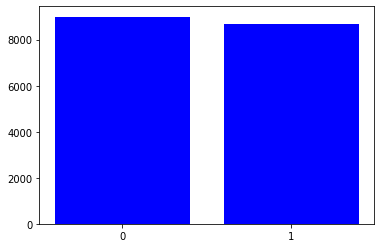

In [49]:
plt.bar(manager_distribution_pd['Manager'].astype(str), manager_distribution_pd['count'], color='blue')
plt.show()

In [50]:
input_features = [col for col in df_boosted.columns if col != 'Manager']
assembler = VectorAssembler(inputCols=input_features, outputCol="features")
df_assembled = assembler.transform(df_boosted)

In [77]:
# Split data
train_df, test_df = df_assembled.randomSplit([0.8, 0.2], seed=42)

# Tree method

In [78]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [79]:
dtc = DecisionTreeClassifier(labelCol='Manager',featuresCol='features')
gbt = GBTClassifier(labelCol='Manager',featuresCol='features')
rfc = RandomForestClassifier(featuresCol='features', labelCol='Manager')

In [80]:
dtc_model = dtc.fit(train_df)
rfc_model = rfc.fit(train_df)
gbt_model = gbt.fit(train_df)

# Model comparison

In [81]:
dtc_predictions = dtc_model.transform(test_df)
rfc_predictions = rfc_model.transform(test_df)
gbt_predictions = gbt_model.transform(test_df)

In [82]:
df_binary = BinaryClassificationEvaluator(labelCol = 'Manager')


In [83]:
print("DTC")
print(df_binary.evaluate(dtc_predictions))

DTC
0.5151189419867326


In [69]:
print("RFC")
print(df_binary.evaluate(rfc_predictions))

RFC
0.6036136392445186


In [70]:
df_gbt = BinaryClassificationEvaluator(labelCol='Manager', rawPredictionCol='prediction')
print("GBT")
print(df_gbt.evaluate(gbt_predictions))

GBT
0.6098584526978493


In [71]:
# Let's import the evaluator.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [72]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol="Manager", predictionCol="prediction", metricName="accuracy")

In [73]:
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)

In [74]:
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 52.99%
----------------------------------------
A random forest ensemble has an accuracy of: 55.55%
----------------------------------------
An ensemble using GBT has an accuracy of: 60.99%


# Importances

In [75]:
importances_gbt = gbt_model.featureImportances
print("Feature Importances:")
for i, col in enumerate(input_features):
    print(f"Importance of {col}: {importances_gbt[i]}")

Feature Importances:
Importance of Division: 0.23140745873343593
Importance of Gender: 0.17815530086989587
Importance of Sexual_Orientation: 0.05453542935121925
Importance of LGBTQ: 0.040518026895368084
Importance of Indigenous: 0.04696274778739502
Importance of Ethnicity: 0.09091451600880271
Importance of Disability: 0.04809235491612831
Importance of Minority: 0.06307631485995827
Importance of Veteran: 0.03834698213851352
Importance of Age: 0.20799086843928294


In [76]:
importances_rfc = rfc_model.featureImportances
print("Feature Importances:")
for i, col in enumerate(input_features):
    print(f"Importance of {col}: {importances_rfc[i]}")

Feature Importances:
Importance of Division: 0.1602924300735034
Importance of Gender: 0.13011606004259965
Importance of Sexual_Orientation: 0.12096117263979381
Importance of LGBTQ: 0.0352223011413715
Importance of Indigenous: 0.020545257508945484
Importance of Ethnicity: 0.07635344041770589
Importance of Disability: 0.0594161071803009
Importance of Minority: 0.0905125664969008
Importance of Veteran: 0.02590031139328459
Importance of Age: 0.280680353105594


# Drop unimportant data

In [84]:
df_boost_new = df_boosted.drop('Sexual_Orientation','LGBTQ','Indigenous','Disability','Veteran')

In [85]:
input_features = [col for col in df_boost_new.columns if col != 'Manager']
assembler = VectorAssembler(inputCols=input_features, outputCol="features")
df_assembled_new = assembler.transform(df_boost_new)

In [86]:
train_df_new, test_df_new = df_assembled_new.randomSplit([0.8, 0.2], seed=42)

In [87]:
dtc_n = DecisionTreeClassifier(labelCol='Manager',featuresCol='features')
gbt_n = GBTClassifier(labelCol='Manager',featuresCol='features')
rfc_n = RandomForestClassifier(featuresCol='features', labelCol='Manager')

In [88]:
dtc_model = dtc.fit(train_df_new)
rfc_model = rfc.fit(train_df_new)
gbt_model = gbt.fit(train_df_new)

In [89]:
dtc_predictions = dtc_model.transform(test_df_new)
rfc_predictions = rfc_model.transform(test_df_new)
gbt_predictions = gbt_model.transform(test_df_new)

In [90]:
df_binary = BinaryClassificationEvaluator(labelCol = 'Manager')

In [91]:
print("DTC")
print(df_binary.evaluate(dtc_predictions))

DTC
0.5141271813073055


In [92]:
print("RFC")
print(df_binary.evaluate(rfc_predictions))

RFC
0.6242146448641566


In [93]:
df_gbt = BinaryClassificationEvaluator(labelCol='Manager', rawPredictionCol='prediction')
print("GBT")
print(df_gbt.evaluate(gbt_predictions))

GBT
0.6282308699877466


In [94]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol="Manager", predictionCol="prediction", metricName="accuracy")

In [95]:
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)

In [96]:
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 55.73%
----------------------------------------
A random forest ensemble has an accuracy of: 57.79%
----------------------------------------
An ensemble using GBT has an accuracy of: 62.82%


In [99]:
importances_gbt = gbt_model.featureImportances
print("Feature Importances:")
for i, col in enumerate(input_features):
    print(f"Importance of {col}: {importances_gbt[i]}")

Feature Importances:
Importance of Division: 0.2243020441302857
Importance of Gender: 0.14985686511580254
Importance of Ethnicity: 0.16571428228168283
Importance of Minority: 0.09997603722126613
Importance of Age: 0.36015077125096273


In [100]:
importances_rfc = rfc_model.featureImportances
print("Feature Importances:")
for i, col in enumerate(input_features):
    print(f"Importance of {col}: {importances_rfc[i]}")

Feature Importances:
Importance of Division: 0.21023155497687948
Importance of Gender: 0.16379846690263544
Importance of Ethnicity: 0.11548038461431172
Importance of Minority: 0.1263543647155488
Importance of Age: 0.38413522879062445


# plot 

In [175]:
import seaborn as sns

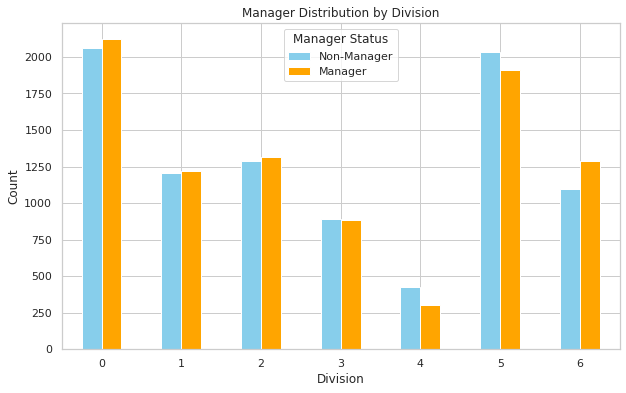

In [183]:
division_manager_count = df_boost_new.groupBy("Division", "Manager").count()
division_manager_pd = division_manager_count.toPandas()
pivot_df = division_manager_pd.pivot(index='Division', columns='Manager', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(kind='bar', ax=ax, color=['skyblue', 'orange'])
ax.set_title('Manager Distribution by Division')
ax.set_xlabel('Division')
ax.set_ylabel('Count')
ax.legend(title='Manager Status', labels=['Non-Manager', 'Manager'])
plt.xticks(rotation=0)  # Rotate division labels for better readability
plt.show()

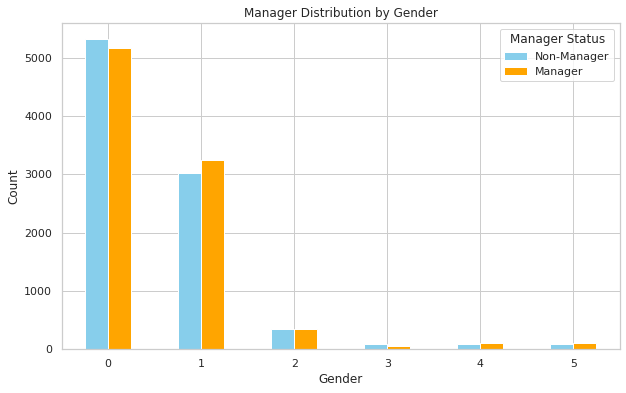

In [184]:
Gender_manager_count = df_boost_new.groupBy("Gender", "Manager").count()
Gender_manager_pd = Gender_manager_count.toPandas()
pivot_df = Gender_manager_pd.pivot(index='Gender', columns='Manager', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(kind='bar', ax=ax, color=['skyblue', 'orange'])
ax.set_title('Manager Distribution by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.legend(title='Manager Status', labels=['Non-Manager', 'Manager'])
plt.xticks(rotation=0)  # Rotate division labels for better readability
plt.show()

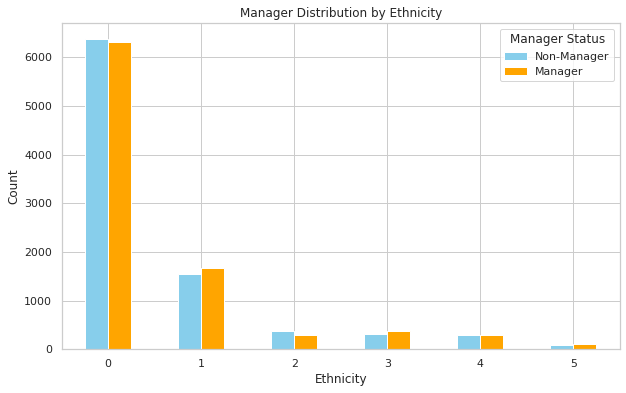

In [185]:
Ethnicity_manager_count = df_boost_new.groupBy("Ethnicity", "Manager").count()
Ethnicity_manager_pd = Ethnicity_manager_count.toPandas()
pivot_df =Ethnicity_manager_pd.pivot(index='Ethnicity', columns='Manager', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(kind='bar', ax=ax, color=['skyblue', 'orange'])
ax.set_title('Manager Distribution by Ethnicity')
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Count')
ax.legend(title='Manager Status', labels=['Non-Manager', 'Manager'])
plt.xticks(rotation=0)  # Rotate division labels for better readability
plt.show()

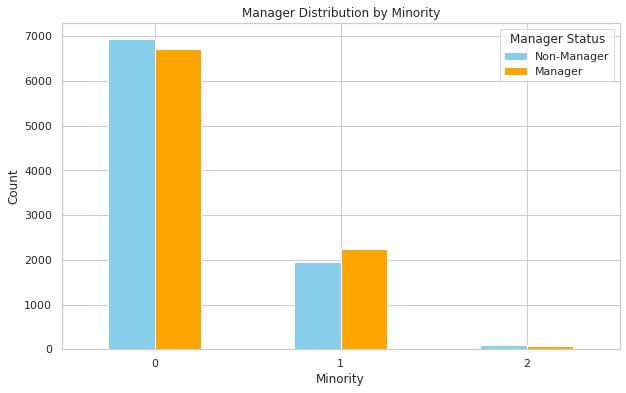

In [186]:
Minority_manager_count = df_boost_new.groupBy("Minority", "Manager").count()
Minority_manager_pd = Minority_manager_count.toPandas()
pivot_df =Minority_manager_pd.pivot(index='Minority', columns='Manager', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(kind='bar', ax=ax, color=['skyblue', 'orange'])
ax.set_title('Manager Distribution by Minority')
ax.set_xlabel('Minority')
ax.set_ylabel('Count')
ax.legend(title='Manager Status', labels=['Non-Manager', 'Manager'])
plt.xticks(rotation=0)  # Rotate division labels for better readability
plt.show()

# Age distribution

In [29]:
from pyspark.sql.functions import col, when

In [30]:
df_Age = df_boosted.withColumn("Age_New", 
                   when((col("Age") >= 20) & (col("Age") < 30), "20-30")
                   .when((col("Age") >= 30) & (col("Age") < 40), "30-40")
                   .when((col("Age") >= 40) & (col("Age") < 50), "40-50")
                   .when((col("Age") >= 50) & (col("Age") < 60), "50-60")
                   .when((col("Age") >= 60) & (col("Age") < 70), "60-70")
                   .otherwise("Other"))

df_Age.show()

+--------+-------+------+------------------+-----+----------+---------+----------+--------+-------+------------------+-------+
|Division|Manager|Gender|Sexual_Orientation|LGBTQ|Indigenous|Ethnicity|Disability|Minority|Veteran|               Age|Age_New|
+--------+-------+------+------------------+-----+----------+---------+----------+--------+-------+------------------+-------+
|       0|      0|     3|                 0|    2|         0|        0|         1|       0|      0|38.821862754948256|  30-40|
|       1|      0|     0|                 0|    0|         1|        0|         0|       1|      0|38.821862754948256|  30-40|
|       2|      0|     1|                 0|    0|         0|        0|         0|       0|      0|38.821862754948256|  30-40|
|       3|      0|     0|                 0|    0|         0|        0|         1|       1|      0|              44.0|  40-50|
|       4|      0|     0|                 0|    0|         0|        1|         0|       0|      0|            

In [31]:
df_Age.printSchema()

root
 |-- Division: integer (nullable = true)
 |-- Manager: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Sexual_Orientation: integer (nullable = true)
 |-- LGBTQ: integer (nullable = true)
 |-- Indigenous: integer (nullable = true)
 |-- Ethnicity: integer (nullable = true)
 |-- Disability: integer (nullable = true)
 |-- Minority: integer (nullable = true)
 |-- Veteran: integer (nullable = true)
 |-- Age: double (nullable = true)
 |-- Age_New: string (nullable = false)



In [32]:
age_manager_distribution = df_Age.groupBy("Age_New").pivot("Manager", [0, 1]).count()
age_manager_distribution.show()

+-------+----+----+
|Age_New|   0|   1|
+-------+----+----+
|  40-50|2340|2260|
|  20-30|1789|1804|
|  60-70| 504| 534|
|  50-60| 891| 891|
|  30-40|3471|3634|
+-------+----+----+



In [33]:
age_manager_distribution_pd = age_manager_distribution.toPandas()

<Figure size 720x432 with 0 Axes>

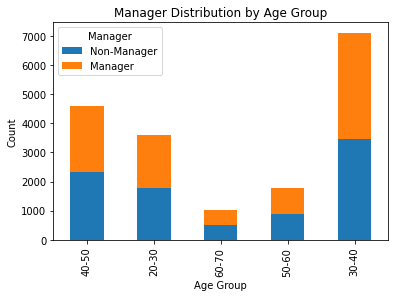

In [36]:
plt.figure(figsize=(10, 6))
age_manager_distribution_pd.set_index('Age_New').plot(kind='bar', stacked=True)
plt.title('Manager Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Manager', labels=['Non-Manager', 'Manager'])
plt.show()

In [115]:
df_New.groupBy('Manager').mean('Age').show()

+-------+------------------+
|Manager|          avg(Age)|
+-------+------------------+
|      1|38.867482161060146|
|      0|  38.8147859922179|
+-------+------------------+



# Correlation 

In [1]:
from pyspark.sql.functions import corr

In [15]:
numeric_cols = [column[0] for column in df_New.dtypes if column[1] in ('int', 'double', 'float')]

In [17]:
# Calculate correlation matrix
correlation_matrix = []
for x in numeric_cols:
    row = []
    for y in numeric_cols:
        corr_value = df.stat.corr(x, y)
        row.append((y, corr_value))
    correlation_matrix.append((x, row))

In [18]:
# Display the correlation matrix
for row in correlation_matrix:
    print(f"Correlations for {row[0]}:")
    for col_corr in row[1]:
        print(f"  {col_corr[0]}: {col_corr[1]:.2f}")
    print("\n")

Correlations for Division:
  Division: 1.00
  Manager: -0.01
  Gender: 0.00
  Sexual_Orientation: -0.01
  LGBTQ: -0.01
  Indigenous: -0.01
  Ethnicity: -0.01
  Disability: -0.00
  Minority: 0.00
  Veteran: -0.01
  Age: -0.01


Correlations for Manager:
  Division: -0.01
  Manager: 1.00
  Gender: 0.01
  Sexual_Orientation: -0.00
  LGBTQ: -0.01
  Indigenous: -0.01
  Ethnicity: 0.00
  Disability: -0.02
  Minority: 0.02
  Veteran: 0.01
  Age: -0.00


Correlations for Gender:
  Division: 0.00
  Manager: 0.01
  Gender: 1.00
  Sexual_Orientation: -0.00
  LGBTQ: 0.06
  Indigenous: 0.01
  Ethnicity: -0.01
  Disability: 0.00
  Minority: 0.01
  Veteran: 0.00
  Age: 0.02


Correlations for Sexual_Orientation:
  Division: -0.01
  Manager: -0.00
  Gender: -0.00
  Sexual_Orientation: 1.00
  LGBTQ: 0.78
  Indigenous: -0.01
  Ethnicity: 0.02
  Disability: -0.01
  Minority: -0.00
  Veteran: 0.01
  Age: -0.01


Correlations for LGBTQ:
  Division: -0.01
  Manager: -0.01
  Gender: 0.06
  Sexual_Orientation